In [74]:
%matplotlib inline
import os
import json
os.chdir('/Users/mono/Documents/Git/Lib/python-for-data-analytics/ch02')
path = 'usagov_bitly_data2012-03-16-1331923249.txt'

In [21]:
records = [json.loads(line) for line in open(path)]
records[0]['tz']

'America/New_York'

In [25]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [27]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [56]:
from collections import defaultdict
import typing
def get_counts(sequence: [str]) -> typing.Dict[str, int]:
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

In [60]:
get_counts(time_zones)['America/New_York']

1251

In [ ]:
def top_counts(count_dict, n=10):
    vks = [(count, tz) for tz, count in count_dict.items()]
    vks.sort()
    return vks[-n:]

In [36]:
top_counts(get_counts(time_zones))

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [39]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [63]:
from pandas import DataFrame, Series
import pandas as pd

frame = DataFrame(records)

In [71]:
tz_counts = frame['tz'].value_counts()
tz_counts

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [70]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

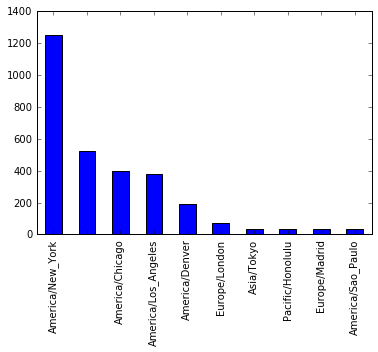

In [86]:
tz_counts[:10].plot(kind='bar', rot=90)

In [82]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [99]:
frame.a.notnull()

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13      False
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
3530     True
3531     True
3532     True
3533     True
3534     True
3535     True
3536     True
3537     True
3538     True
3539     True
3540     True
3541     True
3542     True
3543    False
3544     True
3545     True
3546     True
3547     True
3548     True
3549     True
3550     True
3551     True
3552     True
3553     True
3554     True
3555     True
3556     True
3557     True
3558     True
3559     True
Name: a, dtype: bool

In [ ]:
cframe = frame[frame.a.notnull()]

In [ ]:
import numpy as np
os = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'NotWindows')

In [104]:
os[:5]

array(['Windows', 'NotWindows', 'Windows', 'NotWindows', 'Windows'], 
      dtype='<U10')

In [111]:
by_tz_os = cframe.groupby(['tz', os])

In [130]:
agg_counts = by_tz_os.size().unstack()
agg_counts[:10]

,NotWindows,Windows
tz,,
,245,276
Africa/Cairo,NaN,3
Africa/Casablanca,NaN,1
Africa/Ceuta,NaN,2
Africa/Johannesburg,NaN,1
Africa/Lusaka,NaN,1
America/Anchorage,4,1
America/Argentina/Buenos_Aires,1,NaN
America/Argentina/Cordoba,NaN,1


In [127]:
by_tz_os.size()[:3]

tz                      
              NotWindows    245
              Windows       276
Africa/Cairo  Windows         3
dtype: int64

In [149]:
indexer = agg_counts.sum(1).argsort()
indexer[-10:]

tz
Europe/Sofia        35
Europe/Stockholm    78
Europe/Uzhgorod     96
Europe/Vienna       59
Europe/Vilnius      77
Europe/Volgograd    15
Europe/Warsaw       22
Europe/Zurich       12
Pacific/Auckland     0
Pacific/Honolulu    29
dtype: int64

In [153]:
subset = agg_counts.take(indexer)[-10:]
subset

,NotWindows,Windows
tz,,
America/Sao_Paulo,13,20
Europe/Madrid,16,19
Pacific/Honolulu,NaN,36
Asia/Tokyo,2,35
Europe/London,43,31
America/Denver,132,59
America/Los_Angeles,130,252
America/Chicago,115,285
,245,276


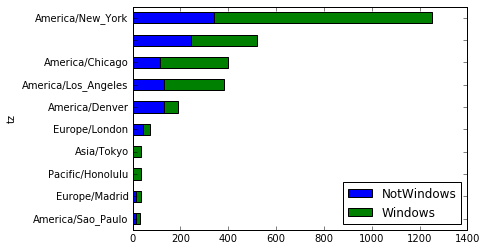

In [156]:
subset.plot(kind='barh', stacked=True)

In [ ]:
import pandas as pd

In [189]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('movielens/users.dat', sep='::', header=None,names=unames, engine='python')
users[:10]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [188]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('movielens/ratings.dat', sep='::', header=None, names=rnames,engine='python')
ratings[:10]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [191]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movielens/movies.dat', sep='::', header=None, names=mnames, engine='python')
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [193]:
data = pd.merge(pd.merge(ratings, users), movies)
data[:5]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [200]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [210]:
rating_by_title = data.groupby('title').size()
rating_by_title[:6]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
1-900 (1994)                       2
dtype: int64

In [217]:
active_titles = rating_by_title.index[rating_by_title  >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [219]:
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738
